In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
customers = pd.read_csv("olist_customers_dataset.csv")

In [3]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders = pd.read_csv("olist_order_items_dataset.csv")

In [5]:
orders.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
dataset = pd.read_csv("olist_orders_dataset.csv")

In [7]:
dataset.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

статусы покупки бывают

In [8]:
dataset.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [9]:
dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
dataset[(dataset['order_status'] == 'canceled') & (dataset['order_approved_at'].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [11]:
dataset[(dataset['order_status'] != 'canceled') & (dataset['order_approved_at'].isna())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00


Как мы видим, заказ может не иметь даты подтверждения, но быть доставленным или созданным. Таких заказов всего 19. И хочется считать любой доставленный заказ купленным. Поэтому будем считать купленными всё, что не отменено (canceled)

In [12]:
dataset.merge(customers, on='customer_id').query("order_status != 'canceled'").groupby("customer_unique_id").count().shape[0]

95560

In [13]:
dataset.merge(customers, on='customer_id').query("order_status != 'canceled'").groupby("customer_unique_id").count().query("order_id == 1").shape[0]

92636

Из 95560 пользователей, совершивших покупку, большинство (92636) совершили покупку один раз 

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [14]:
dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [15]:
pd.to_datetime(dataset['order_purchase_timestamp']).min()

Timestamp('2016-09-04 21:15:19')

In [16]:
pd.to_datetime(dataset['order_purchase_timestamp']).max()

Timestamp('2018-10-17 17:30:18')

Мы проверяем зависимость только по месяцам. Однако надо иметь в виду, что события разных лет в один месяц будут объедены (если треубется это избежать, можно добавить в группировку год). В этой работе мы считаем, что нас интересуют месяца, потому что мы хотим наблюдать только сезонные изменения

In [17]:
dataset['month'] =pd.to_datetime(dataset['order_purchase_timestamp']).dt.month

In [18]:
dataset.query("order_status != 'delivered'").groupby(["month", "order_status"], as_index=False).agg({"order_id":"count"}).groupby("order_status").agg({"order_id":'mean'}).rename(columns={'order_id':'mean'})

,mean
order_status,
approved,1.000000
canceled,52.083333
created,1.666667
invoiced,26.166667
processing,25.083333
shipped,92.250000
unavailable,50.750000


Если рассматривать задачу более детально по месяцам. На самом деле, так больше смылсла, так как сайт мог изменяться и обновляться, а у пользователей могли меняться из года в год представления о потребностях.

In [19]:
dataset['year'] =pd.to_datetime(dataset['order_purchase_timestamp']).dt.year

In [20]:
dataset.query("order_status != 'delivered'").groupby(["month", "year", "order_status"], as_index=False).agg({"order_id":"count"}).groupby("order_status").agg({"order_id":'mean'}).rename(columns={'order_id':'mean'})

,mean
order_status,
approved,1.000000
canceled,26.041667
created,1.666667
invoiced,14.952381
processing,15.842105
shipped,48.130435
unavailable,29.000000


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

если товар покупался одинаковое количество в разные дни недели, будут выведены оба дня

In [21]:
dataset['day_of_week'] =pd.to_datetime(dataset['order_purchase_timestamp']).dt.day_name()

In [22]:
products = orders.merge(dataset.query("order_status != 'canceled'"), on='order_id').groupby(['product_id', 'day_of_week'], as_index=False).agg({'order_id':'count'})

In [23]:
products.merge(products.groupby('product_id').agg({'order_id':'max'}), on=['product_id', 'order_id']).rename(columns={'order_id':'number_of_orders'}).sort_values('number_of_orders', ascending=False)

,product_id,day_of_week,number_of_orders
11041,422879e10f46682990de24d770e7f83d,Wednesday,93
25242,99a4788cb24856965c36a24e339b6058,Monday,92
28310,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
13900,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
9390,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
16233,62410fbefbe7df2abf7e6b23e64255ee,Friday,1
16231,623eee74e76dce26984376983737af86,Thursday,1
16230,623eb5b692e915575c7392ca5cd5cd53,Wednesday,1
16229,623eb5b692e915575c7392ca5cd5cd53,Tuesday,1


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [24]:
dataset['days_in_month'] = dataset.apply(lambda x: pd.Period(x['order_purchase_timestamp']).days_in_month, axis=1)

In [25]:
customers_orders = dataset.merge(customers, on='customer_id').query("order_status != 'canceled'").groupby(["customer_unique_id", "month"], as_index=False).agg({'order_id':'count', 'days_in_month': 'max'})

In [26]:
customers_orders['avg_purchases'] = customers_orders['order_id'] * 7 / customers_orders['days_in_month']

In [27]:
customers_orders.rename(columns={'order_id':'number_of_purchases'}).sort_values('avg_purchases', ascending=False)

,customer_unique_id,month,number_of_purchases,days_in_month,avg_purchases
7271,12f5d6e1cbf93dafd9dcc19095df0b3d,1,6,31,1.354839
53681,8d50f5eadf50201ccdcedfb9e2ac8455,7,5,31,1.129032
68940,b4e4f24de1e8725b74e4a1f4975116ed,2,4,28,1.000000
61790,a239b8e2fbce33780f1f1912e2ee5275,2,4,28,1.000000
23787,3e43e6105506432c953e165fb2acf44c,2,4,28,1.000000
...,...,...,...,...,...
40731,6ac52814155aa5b8da64bb30a14c6b3b,5,1,31,0.225806
40732,6ac5a10275f1f5885f87a85356c980b9,3,1,31,0.225806
40734,6ac6902b78ed854e42f75c8e25234e8c,8,1,31,0.225806
40735,6ac7fe1248debb910d994bf2e7009856,3,1,31,0.225806


А теперь учтём и года

In [28]:
customers_orders_years = dataset.merge(customers, on='customer_id').query("order_status != 'canceled'").groupby(["customer_unique_id", "month", "year"], as_index=False).agg({'order_id':'count', 'days_in_month': 'max'})

In [29]:
customers_orders_years['avg_purchases'] = customers_orders_years['order_id'] * 7 / customers_orders_years['days_in_month']

In [30]:
customers_orders_years.rename(columns={'order_id':'number_of_purchases'}).sort_values('avg_purchases', ascending=False)

,customer_unique_id,month,year,number_of_purchases,days_in_month,avg_purchases
7274,12f5d6e1cbf93dafd9dcc19095df0b3d,1,2017,6,31,1.354839
61823,a239b8e2fbce33780f1f1912e2ee5275,2,2017,4,28,1.000000
68974,b4e4f24de1e8725b74e4a1f4975116ed,2,2018,4,28,1.000000
23798,3e43e6105506432c953e165fb2acf44c,2,2018,4,28,1.000000
14393,25a560b9a6006157838aab1bdbd68624,4,2017,4,30,0.933333
...,...,...,...,...,...,...
40743,6abfc2aef3b5c263bcf70e56a6b79fc1,8,2017,1,31,0.225806
40744,6ac0e68ca06c7a126ba938508ed19f86,3,2018,1,31,0.225806
40745,6ac1c6087ba110c7b36bb63c2efa55e8,7,2018,1,31,0.225806
40749,6ac3770209c7cf2e5b54d47abb41063a,8,2018,1,31,0.225806


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.


In [31]:
first_join = customers_orders.groupby('customer_unique_id', as_index=False).agg({'month':'min'})

In [32]:
customers_orders_with_first_join = customers_orders.merge(first_join, on='customer_unique_id', how='left')

In [33]:
customers_orders_with_first_join.rename(columns={'month_x':'month', 'month_y':'first_month'}, inplace=True)

In [34]:
customers_orders_with_first_join['is_difference_three_month'] = customers_orders_with_first_join.apply(lambda x: 1 if (x['month'] - x['first_month'] == 3) or (x['month'] == 1 and x['first_month'] == 10) or (x['month'] == 2 and x['first_month'] == 11) or (x['month'] == 3 and x['first_month'] == 12) else 0, axis=1)

In [35]:
customers_orders_with_first_join[customers_orders_with_first_join['is_difference_three_month'] == 1]

,customer_unique_id,month,order_id,days_in_month,avg_purchases,first_month,is_difference_three_month
607,018b5a7502c30eb5f230f1b4eb23a156,8,1,31,0.225806,5,1
1238,0333b2fc6ba7014702e08ef613850270,11,1,30,0.233333,8,1
2685,070acf4df1234a6257809e4e79644481,10,1,31,0.225806,7,1
2710,071bb277b0146da77fac31e70657815e,7,1,31,0.225806,4,1
2895,078f7e669cebf2fb640d0ad0dabb3068,5,1,31,0.225806,2,1
...,...,...,...,...,...,...,...
93618,f5d32f2ee3d4caec1870de481c276bd8,6,1,30,0.233333,3,1
93749,f62d6572c9c25b3796d058d7b833f8b7,6,1,30,0.233333,3,1
94003,f6dc4789e4669873c35f8f92fdbed89f,8,1,31,0.225806,5,1
94832,f9165be8a411384aab9f945394418a0c,8,1,31,0.225806,5,1


In [36]:
co_final = customers_orders_with_first_join.groupby('first_month', as_index=False).agg({'month':'count', 'is_difference_three_month':'sum'})

In [37]:
co_final['retention'] = co_final['is_difference_three_month'] / co_final['month']

In [38]:
co_final[['first_month', 'retention']].sort_values('retention', ascending=False)

,first_month,retention
2,3,0.004449
1,2,0.003906
0,1,0.003772
4,5,0.003544
3,4,0.003426
8,9,0.002444
5,6,0.002163
6,7,0.001996
7,8,0.001439
9,10,0.000000


Теперь повторим всё тоже самое, но учтём года. Так мы получим детально более подробную картинку. В ней мы исключим случаи, когда пользователь возвращается через год и 3 месяца

In [39]:
first_join_y = customers_orders_years.groupby('customer_unique_id', as_index=False).agg({'month':'min', 'year':'min'})

In [40]:
c_o_with_f_j_y = customers_orders_years.merge(first_join_y, on='customer_unique_id', how='left')

In [41]:
c_o_with_f_j_y.rename(columns={'month_x':'month', 'month_y':'first_month', 'year_x':'year', 'year_y':'first_year'}, inplace=True)

In [42]:
c_o_with_f_j_y['is_difference_three_month'] = c_o_with_f_j_y.apply(lambda x: 1 if (x['month'] - x['first_month'] == 3 and x['year'] == x['first_year']) or (x['month'] == 1 and x['first_month'] == 10 and x['year'] == x['first_year']+1) or (x['month'] == 2 and x['first_month'] == 11 and x['year'] == x['first_year']+1) or (x['month'] == 3 and x['first_month'] == 12 and x['year'] == x['first_year']+1) else 0, axis=1)

In [43]:
c_o_with_f_j_y[c_o_with_f_j_y['is_difference_three_month'] == 1]

,customer_unique_id,month,year,order_id,days_in_month,avg_purchases,first_month,first_year,is_difference_three_month
607,018b5a7502c30eb5f230f1b4eb23a156,8,2017,1,31,0.225806,5,2017,1
1238,0333b2fc6ba7014702e08ef613850270,11,2017,1,30,0.233333,8,2017,1
2685,070acf4df1234a6257809e4e79644481,10,2017,1,31,0.225806,7,2017,1
2710,071bb277b0146da77fac31e70657815e,7,2017,1,31,0.225806,4,2017,1
2895,078f7e669cebf2fb640d0ad0dabb3068,5,2018,1,31,0.225806,2,2018,1
...,...,...,...,...,...,...,...,...,...
92591,f31ac54af6af7097bddd1053011e7a3a,11,2017,1,30,0.233333,8,2017,1
93663,f5d32f2ee3d4caec1870de481c276bd8,6,2018,1,30,0.233333,3,2018,1
93794,f62d6572c9c25b3796d058d7b833f8b7,6,2017,1,30,0.233333,3,2017,1
94048,f6dc4789e4669873c35f8f92fdbed89f,8,2018,1,31,0.225806,5,2018,1


In [44]:
co_final_y = c_o_with_f_j_y.groupby(['first_month', 'first_year'], as_index=False).agg({'month':'count', 'is_difference_three_month':'sum'})

In [45]:
co_final_y['retention'] = co_final_y['is_difference_three_month'] / co_final_y['month']

In [46]:
co_final_y[['first_month', 'first_year', 'retention']].sort_values('retention', ascending=False)

,first_month,first_year,retention
17,7,2016,0.500000
15,6,2017,0.005789
3,2,2017,0.005615
6,3,2017,0.005592
18,7,2017,0.004796
9,4,2017,0.004699
1,1,2017,0.004541
12,5,2017,0.004496
20,8,2017,0.003562
4,2,2018,0.002926


# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [47]:
do = customers.merge(dataset, on='customer_id')

In [48]:
df = do.merge(orders, on='order_id')

In [49]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,month,year,day_of_week,days_in_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,5,2017,Tuesday,31,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,2018,Friday,31,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5,2018,Saturday,31,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,3,2018,Tuesday,31,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,7,2018,Sunday,31,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,4,2018,Saturday,30,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,4,2018,Wednesday,30,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,4,2018,Sunday,30,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,11,2017,Friday,30,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [50]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

In [51]:
last_payment = df.groupby('customer_unique_id', as_index=False).agg({'order_approved_at':'max'})

In [52]:
df = df.merge(last_payment, how='left', on='customer_unique_id').rename(columns={'order_approved_at_y':'last_payment'})

In [53]:
df['R'] = (pd.to_datetime('now') - df['last_payment']).dt.days

In [54]:
customers_orders.head(1)

,customer_unique_id,month,order_id,days_in_month,avg_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,5,1,31,0.225806


In [55]:
number_of_purchases = df.query("order_status != 'canceled'").groupby('customer_unique_id', as_index=False).agg({'order_status':'count'}).rename(columns={'order_status':'number_of_purchases'})

In [56]:
df = df.merge(customers_orders, how='left', on='customer_unique_id').rename(columns={'order_id_y':'F'})

In [57]:
RFM = df.groupby('customer_unique_id').agg({'F':'max', 'R':'max', 'price':'sum'}).rename(columns={'price':'M'})

In [58]:
RFM.head()

,F,R,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1.0,1840.0,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1843.0,18.90
0000f46a3911fa3c0805444483337064,1.0,2266.0,69.00
0000f6ccb0745a6a4b88665a16c9f078,1.0,2050.0,25.99
0004aac84e0df4da2b147fca70cf8255,1.0,2017.0,180.00


In [59]:
RFM.F.nunique()

6

In [60]:
RFM.F.value_counts()

1.0    93674
2.0     1259
3.0       47
4.0        7
6.0        1
5.0        1
Name: F, dtype: int64

Даже ML странно обучать на значении, которое принимается один раз (очень легко переучиться). Поэтому разделим выборку на 3 части: одна покупка, две и более двух

In [61]:
RFM['F_categories'] = RFM.F.apply(lambda x: 1 if x == 1 else 2 if x == 2 else 3)

In [62]:
RFM.nunique()

F                  6
R                610
M               9031
F_categories       3
dtype: int64

In [63]:
RFM.R.nunique()

610

In [64]:
RFM.R.min()

1724.0

In [65]:
RFM.R.max()

2442.0

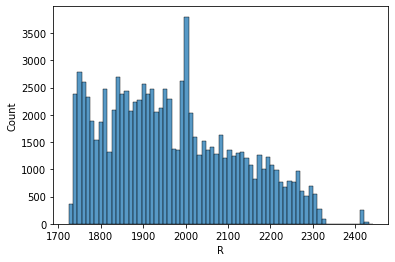

In [66]:
sns.histplot(RFM.R)

График смещен влево. Есть выброс. Однако нет четкого понимания из графика, на какие группы мы хотим разделить пользователей. Поэтому, раз всё время до этого мы ориентировались на месяца, разделим на группы по промежуткам в 30 дней.

In [67]:
RFM['R_cogorts'] = RFM.R.apply(lambda x: (x-RFM.R.min())//30)

In [68]:
RFM.R_cogorts.value_counts()

9.0     8019
6.0     7060
7.0     6967
4.0     6713
5.0     6711
3.0     6295
1.0     6265
2.0     6159
0.0     5327
8.0     4791
10.0    4254
11.0    4099
13.0    3897
12.0    3828
15.0    3344
14.0    3036
16.0    2644
17.0    2401
18.0    1866
19.0    1379
23.0     299
20.0      53
Name: R_cogorts, dtype: int64

In [69]:
RFM.M.nunique()

9031

In [70]:
RFM.M.min()

0.85

In [71]:
RFM.M.max()

13440.0

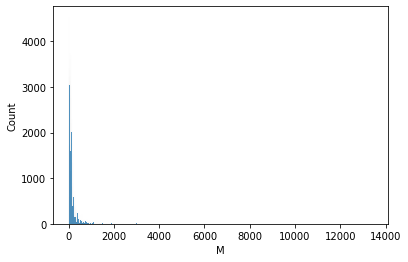

In [72]:
sns.histplot(RFM.M)

Есть достаточно большие выбросы. Большинство значений до 1000

Разделим на 3 категории: высокий доход, средний и низкий 

In [73]:
RFM_M = pd.cut(RFM.M, 3)

In [74]:
RFM = RFM.reset_index()

In [75]:
RFM_M = RFM_M.to_frame().reset_index()

In [76]:
RFM_cogorts = RFM.merge(RFM_M, on='customer_unique_id').rename(columns={'M_x':'M', 'M_y':'M_cogorts'})

In [77]:
RFM_cogorts.head()

,customer_unique_id,F,R,M,F_categories,R_cogorts,M_cogorts
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,1840.0,129.90,1,3.0,"(-12.589, 4480.567]"
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,1843.0,18.90,1,3.0,"(-12.589, 4480.567]"
2,0000f46a3911fa3c0805444483337064,1.0,2266.0,69.00,1,18.0,"(-12.589, 4480.567]"
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,2050.0,25.99,1,10.0,"(-12.589, 4480.567]"
4,0004aac84e0df4da2b147fca70cf8255,1.0,2017.0,180.00,1,9.0,"(-12.589, 4480.567]"


In [78]:
RFM_final = RFM_cogorts.groupby(['F_categories', 'R_cogorts', 'M_cogorts']).agg({'F':'count'}).rename(columns={'F':'number_of_items'}).sort_values('number_of_items', ascending=False)

In [79]:
RFM_final.query("number_of_items != 0")

number_of_items
F_categories R_cogorts M_cogorts                            
1            9.0       (-12.589, 4480.567]              7895
             6.0       (-12.589, 4480.567]              6842
             7.0       (-12.589, 4480.567]              6807
             4.0       (-12.589, 4480.567]              6638
             5.0       (-12.589, 4480.567]              6623
...                                                      ...
2            2.0       (4480.567, 8960.283]                1
1            18.0      (4480.567, 8960.283]                1
             16.0      (4480.567, 8960.283]                1
2            0.0       (4480.567, 8960.283]                1
3            14.0      (-12.589, 4480.567]                 1

[79 rows x 1 columns]